## EDA

In [1]:
import pandas as pd
import numpy as np
import pickle
import os

import seaborn as sns

In [2]:
#from ydata_profiling import ProfileReport

In [3]:
import matplotlib.pyplot as plt

In [4]:
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 100)
pd.options.display.float_format = '{:.0f}'.format

In [5]:
DATA_ROOT_DIR='/mnt/data/projects/MD7'
PROJ_ROOT_DIR='/home/priyesh/projects/MD7'

In [6]:
filepath=os.path.join(DATA_ROOT_DIR,'data/import','yahoo_cash.csv')
cash_sheets = pd.read_csv(filepath)
filepath=os.path.join(DATA_ROOT_DIR,'data/import','yahoo_balance.csv')
balance_sheets = pd.read_csv(filepath)
filepath=os.path.join(DATA_ROOT_DIR,'data/import','yahoo_income.csv')
income_sheets = pd.read_csv(filepath)
filepath=os.path.join(DATA_ROOT_DIR,'data/import','yahoo_data_labels.csv')
data_labels = pd.read_csv(filepath)

In [7]:
filepath=os.path.join(PROJ_ROOT_DIR,'pickle','yahoo_complete.pkl')
df = pd.read_pickle(filepath)

In [8]:
df.head()

,company,industry,st_YR,inc_totalRevenue,inc_costOfRevenue,inc_grossProfit,inc_netIncome,inc_operatingIncome,inc_netIncomeContinuousOperations,inc_netInterestIncome,inc_interestIncome,inc_otherIncomeExpense,inc_operatingExpense,inc_totalExpenses,inc_taxProvision,inc_interestExpense,inc_SGA,inc_researchAndDevelopment,inc_ebit,inc_dilutedEPS,inc_basicEPS,bal_cashEquivalent,bal_receivables,bal_finishedGoods,bal_workInProcess,bal_rawMaterials,bal_otherCurrentAssets,bal_inventory,bal_currentAssets,bal_netPPE,bal_otherNonCurrentAssets,bal_financialAssets,bal_goodwill,bal_goodwillAndOtherIntangibleAssets,bal_otherIntangibleAssets,bal_nonCurrentAccountsReceivable,bal_totalNonCurrentAssets,bal_currentDebt,bal_payablesAndAccruedExpenses,bal_otherCurrentLiabilities,bal_currentLiabilities,bal_longTermDebt,bal_otherNonCurrentLiabilities,bal_nonCurrentDeferredLiabilities,bal_nonCurrentDeferredTaxesLiabilities,bal_longTermProvisions,bal_totalNonCurrentLiabilities,bal_retainedEarnings,bal_stockholdersEquity,bal_totalDebt,bal_totalAssets,bal_totalLiabilities,bal_workingCapital,bal_quickRatio,bal_currentRatio,bal_debtCapitalRatio,bal_debtAssetRatio,cas_depreciation,cas_stockBasedCompensation,cas_cashFlowOperatingActivities,cas_capitalExpenditure,cas_saleOfBusiness,cas_purchaseOfPPE,cas_cashFlowInvestingActivities,cas_cashDividendsPaid,cas_repurchaseOfCapitalStock,cas_cashFlowFinancingActivities,cas_freeCashFlow,FinalScore
0,A,Diagnostics & Research,2019,5163000000,2358000000,2805000000,1071000000,941000000,1071000000,-38000000,36000000,16000000,1864000000,4222000000,-152000000,74000000,1460000000,404000000,993000000,3,3,1382000000,930000000,416000000,0,263000000,198000000,679000000,3189000000,850000000,611000000,0,4700000000,4700000000,1107000000,0,6263000000,616000000,794000000,0,2080000000,1791000000,473000000,0,0,0,2624000000,-18000000,4748000000,2407000000,9452000000,4704000000,1109000000,1,1,33,25,238000000,72000000,1021000000,156000000,0,155000000,1590000000,206000000,723000000,299000000,865000000,3
1,A,Diagnostics & Research,2020,5339000000,2502000000,2837000000,719000000,846000000,719000000,-70000000,8000000,66000000,1991000000,4493000000,123000000,78000000,1496000000,495000000,920000000,2,2,1441000000,1038000000,417000000,0,303000000,216000000,720000000,3415000000,845000000,776000000,0,4433000000,4433000000,831000000,0,6212000000,75000000,639000000,0,1467000000,2284000000,614000000,0,0,0,3287000000,81000000,4873000000,2359000000,9627000000,4754000000,1948000000,1,2,32,24,308000000,83000000,921000000,119000000,0,119000000,147000000,222000000,469000000,717000000,802000000,3
2,A,Diagnostics & Research,2021,6319000000,2912000000,3407000000,1210000000,1347000000,1210000000,-79000000,2000000,92000000,2060000000,4972000000,150000000,81000000,1619000000,441000000,1441000000,3,3,1575000000,1172000000,463000000,0,367000000,222000000,830000000,3799000000,945000000,820000000,0,4956000000,4956000000,981000000,0,6906000000,0,774000000,0,1708000000,2729000000,659000000,0,0,0,3608000000,348000000,5389000000,2729000000,10705000000,5316000000,2091000000,1,2,33,25,321000000,110000000,1485000000,189000000,0,188000000,749000000,236000000,788000000,696000000,1296000000,3
3,A,Diagnostics & Research,2022,6848000000,3126000000,3722000000,1254000000,1618000000,1254000000,-75000000,9000000,-39000000,2104000000,5230000000,250000000,84000000,1637000000,467000000,1588000000,4,4,1053000000,1405000000,555000000,0,483000000,282000000,1038000000,3778000000,1100000000,670000000,0,4773000000,4773000000,821000000,0,6738000000,36000000,909000000,0,1861000000,2733000000,536000000,0,0,0,3366000000,324000000,5289000000,2769000000,10516000000,5227000000,1917000000,1,2,34,26,317000000,125000000,1312000000,291000000,0,291000000,338000000,250000000,1139000000,1372000000,1021000000,3
4,AA,Aluminum,2019,10433000000,8537000000,1896000000,-1125000000,876000000,-853000000,-121000000,0,-1193000000,1020000000,9557000000,415000000,121000000,280000000,27000000,-317000000,-6,-6,879000000,6

In [41]:
df.describe()

,st_YR,inc_totalRevenue,inc_costOfRevenue,inc_grossProfit,inc_netIncome,inc_operatingIncome,inc_netIncomeContinuousOperations,inc_netInterestIncome,inc_interestIncome,inc_otherIncomeExpense,inc_operatingExpense,inc_totalExpenses,inc_taxProvision,inc_interestExpense,inc_SGA,inc_researchAndDevelopment,inc_ebit,inc_dilutedEPS,inc_basicEPS,bal_cashEquivalent,bal_receivables,bal_finishedGoods,bal_workInProcess,bal_rawMaterials,bal_otherCurrentAssets,bal_inventory,bal_currentAssets,bal_netPPE,bal_otherNonCurrentAssets,bal_financialAssets,bal_goodwill,bal_goodwillAndOtherIntangibleAssets,bal_otherIntangibleAssets,bal_nonCurrentAccountsReceivable,bal_totalNonCurrentAssets,bal_currentDebt,bal_payablesAndAccruedExpenses,bal_otherCurrentLiabilities,bal_currentLiabilities,bal_longTermDebt,bal_otherNonCurrentLiabilities,bal_nonCurrentDeferredLiabilities,bal_nonCurrentDeferredTaxesLiabilities,bal_longTermProvisions,bal_totalNonCurrentLiabilities,bal_retainedEarnings,bal_stockholdersEquity,bal_totalDebt,bal_totalAssets,bal_totalLiabilities,bal_workingCapital,bal_quickRatio,bal_currentRatio,bal_debtCapitalRatio,bal_debtAssetRatio,cas_depreciation,cas_stockBasedCompensation,cas_cashFlowOperatingActivities,cas_capitalExpenditure,cas_saleOfBusiness,cas_purchaseOfPPE,cas_cashFlowInvestingActivities,cas_cashDividendsPaid,cas_repurchaseOfCapitalStock,cas_cashFlowFinancingActivities,cas_freeCashFlow,FinalScore
count,2912.00,2912.00,2912.00,2912.00,2912.00,2912.00,2912.00,2912.00,2912.00,2912.00,2912.00,2912.00,2912.00,2912.00,2912.00,2912.00,2912.00,2912.00,2912.00,2912.00,2912.00,2912.00,2912.00,2912.00,2912.00,2912.00,2912.00,2912.00,2912.00,2912.00,2912.00,2912.00,2912.00,2912.00,2912.00,2912.00,2912.00,2912.00,2912.00,2912.00,2912.00,2912.00,2912.00,2912.00,2912.00,2912.00,2912.00,2912.00,2912.00,2912.00,2912.00,2912.00,2912.00,2912.00,2912.00,2912.00,2912.00,2912.00,2912.00,2912.00,2912.00,2912.00,2912.00,2912.00,2912.00,2912.00,2912.00
mean,2020.59,16373030415.48,10928580768.44,5438547023.08,1327383026.33,2096451054.24,1322646775.30,-257285887.18,36466067.65,-109669393.74,3664900403.93,14368151816.60,310985971.58,292517026.95,2469052013.53,545294781.19,2003516603.75,4.30,4.40,2592150347.21,2124474070.40,820854672.89,181842525.54,267507252.95,503701023.16,12577024416.75,7078759127.79,7945380062.34,1213088992.82,13178375.69,4029274996.68,6688948755.66,2678309180.34,226094401.44,17552441103.88,871267531.29,3174344576.52,744772097.31,6639118103.15,7844909452.75,1368852999.59,1196285742.06,970537782.93,188177668.96,11106113801.31,6344942089.27,7912931133.56,8716176984.04,24631200231.67,17745231904.46,439641024.64,1.21,1.67,52.54,35.93,1016983503.00,199426993.20,2488221419.24,1119237358.04,131263702.61,628844672.95,1379990463.86,587338066.51,783992268.35,1021923065.29,1418858735.99,2.32
std,1.15,40748904663.24,31202764143.30,13139659360.57,5276033799.42,7862261787.04,5286553341.44,639691030.05,209455845.18,1432078381.98,10203704711.76,37036420805.31,1137910507.49,650171336.87,6212399221.58,2454228685.50,7989554273.00,20.90,21.49,8962706444.81,5059356684.85,4063293675.58,765245970.74,707037813.04,1525669706.55,292070747526.60,16426701932.43,19866947989.42,3468506015.56,125862294.07,9221563491.91,18368519266.86,10806095411.03,2438301065.99,37304316781.85,3374882412.71,8225014064.85,2852988038.47,35193164171.03,16128193360.56,4514563456.38,3749283144.46,3508215658.33,1028279594.00,22954499241.67,22845216215.12,19082919718.12,18088240696.00,49258056196.40,48168666176.69,29955592917.22,2.94,3.02,72.74,28.32,2723829126.54,910413703.58,7334191822.14,3456513348.28,780961024.89,2843829275.28,4149479824.99,1693867344.01,3866905299.11,5838875652.05,5496674511.30,0.87
min,2019.00,-100469000.00,0.00,-7596000000.00,-22440000000.00,-28883000000.00,-23251000000.00,-9806000000.00,-58441000.00,-20216000000.00,-2201000000.00,-808922000.00,-5632000000.00,-38505000.00,-382000000.00,0.00,-28883000000.00,-121.00,-121.00,0.00,0.00,0.00,0.00,0.00,-1000000.00,0.00,27409000.0

In [9]:
# Append labels
#df_temp = data_labels[['company','FinalScore']]

#df = pd.merge(df, df_temp, on=['company',], how='inner')

#df_temp = data_labels[['company','FinalScore']]
#df_complete = pd.merge(df_complete, df_temp, on=['company'], how='inner')

In [10]:
x = df['industry'].unique()
len(x)

104

### Check for Imbalance Dataset

<Axes: title={'center': 'Count of Records for Each Class'}, xlabel='FinalScore', ylabel='Count'>

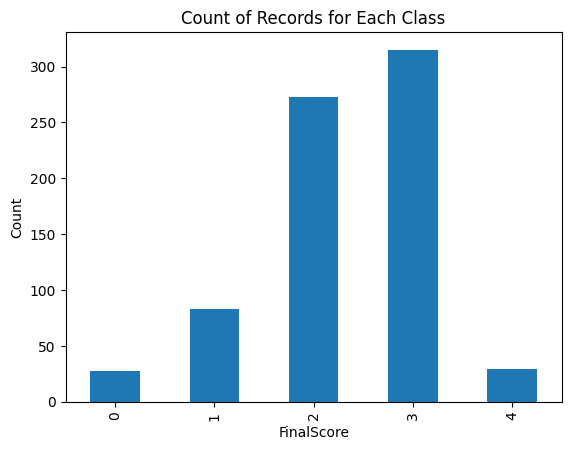

In [11]:
df_temp = data_labels['FinalScore'].value_counts().sort_index()
plt.ylabel("Count")
plt.title("Count of Records for Each Class")
df_temp.plot.bar()

### Check Distributions

In [12]:
pd.options.display.float_format = '{:.2f}'.format
df.iloc[:,2:].skew().sort_values()

bal_workingCapital                       -24.71
inc_netInterestIncome                     -6.40
inc_otherIncomeExpense                    -3.28
FinalScore                                -0.66
st_YR                                      0.04
bal_debtAssetRatio                         4.82
bal_totalAssets                            4.97
bal_totalDebt                              5.31
bal_totalNonCurrentLiabilities             5.33
cas_cashDividendsPaid                      5.43
bal_longTermDebt                           5.47
bal_totalNonCurrentAssets                  5.55
cas_cashFlowInvestingActivities            5.66
bal_netPPE                                 5.78
bal_rawMaterials                           6.09
bal_receivables                            6.17
bal_goodwill                               6.31
bal_stockholdersEquity                     6.36
bal_currentAssets                          6.43
inc_grossProfit                            6.68
inc_interestExpense                     

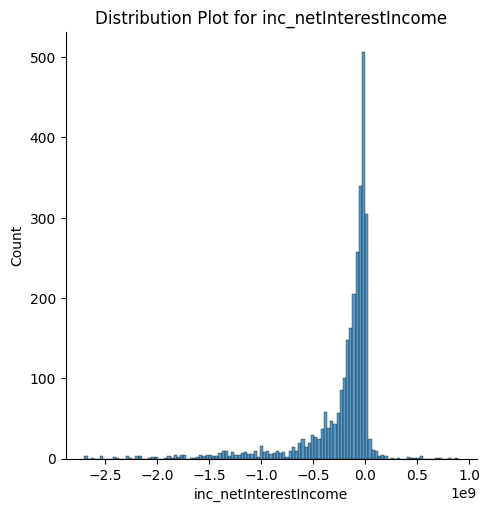

In [13]:
feature='inc_netInterestIncome'
df_temp = df[(df[feature] > -3000000000) & (df[feature] < 1000000000)]
#df_temp
sns.displot(df_temp[feature]).set(title="Distribution Plot for " + feature)

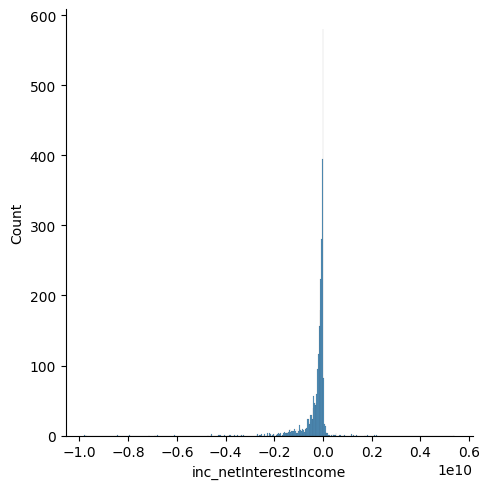

In [14]:
feature='inc_netInterestIncome'
#df_temp = df[(df[feature] > -3000000000) & (df[feature] < 1000000000)]
df_temp = df
sns.displot(df_temp[feature])

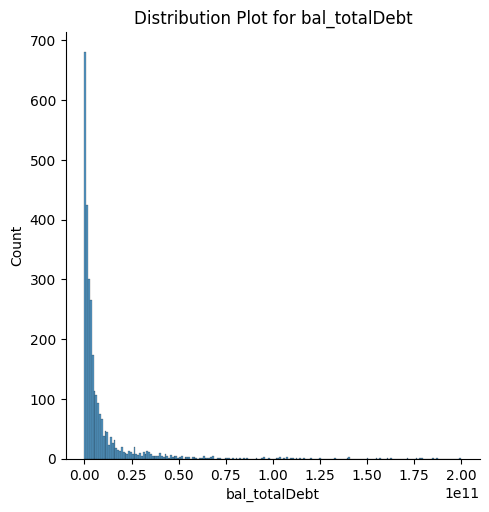

In [15]:
feature='bal_totalDebt'
#df_temp = df[(df[feature] > -3000000000) & (df[feature] < 1000000000)]
df_temp = df[(df[feature] < 400000000000)]
#df_temp = df
#df_temp
sns.displot(df_temp[feature]).set(title="Distribution Plot for " + feature)

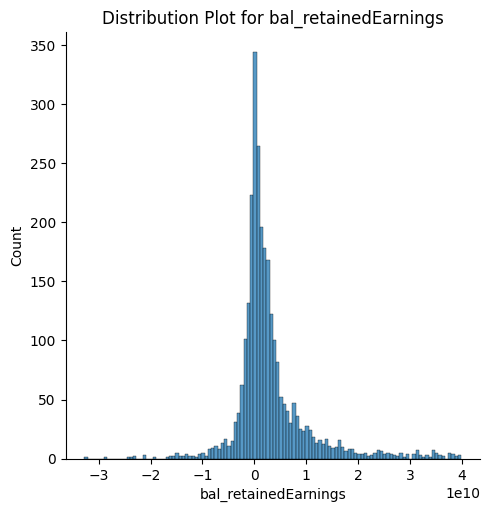

In [16]:
feature='bal_retainedEarnings'
#df_temp = df[(df[feature] > -3000000000) & (df[feature] < 1000000000)]
df_temp = df[(df[feature] < 40000000000)]
#df_temp = df
#df_temp
sns.displot(df_temp[feature]).set(title="Distribution Plot for " + feature)

In [17]:
df[['company','FinalScore']].head(80)

,company,FinalScore
0,A,3
1,A,3
2,A,3
3,A,3
4,AA,3
5,AA,3
6,AA,3
7,AA,3
8,AAL,1
9,AAL,1


### Boxplots

<Axes: >

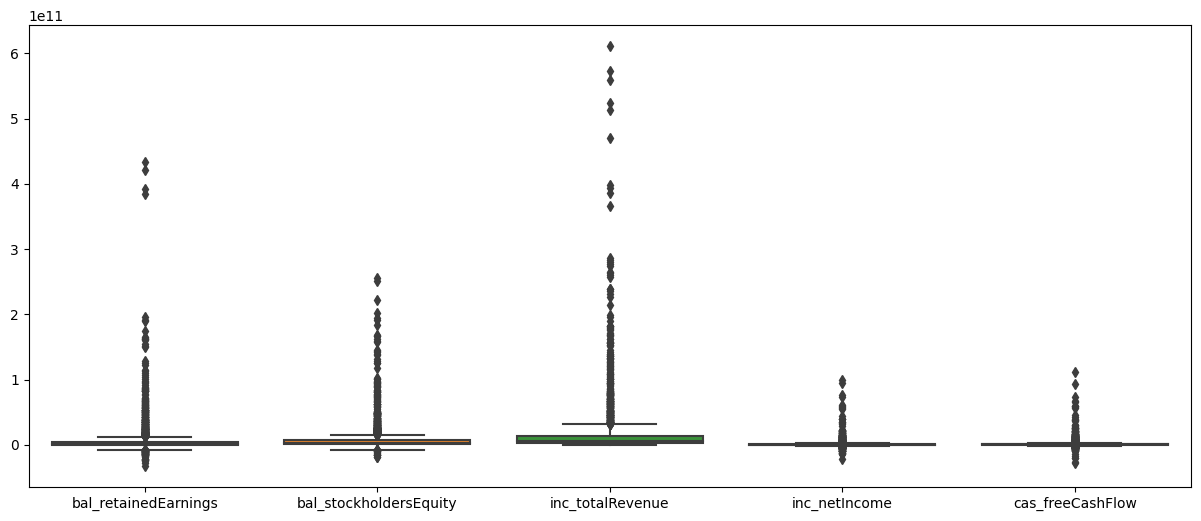

In [18]:
plt.figure(figsize=(15,6))
featureList =['bal_retainedEarnings','bal_stockholdersEquity','inc_totalRevenue','inc_netIncome','cas_freeCashFlow']
df_temp = df[featureList]
sns.boxplot(data=df_temp)

<Axes: xlabel='FinalScore', ylabel='industry'>

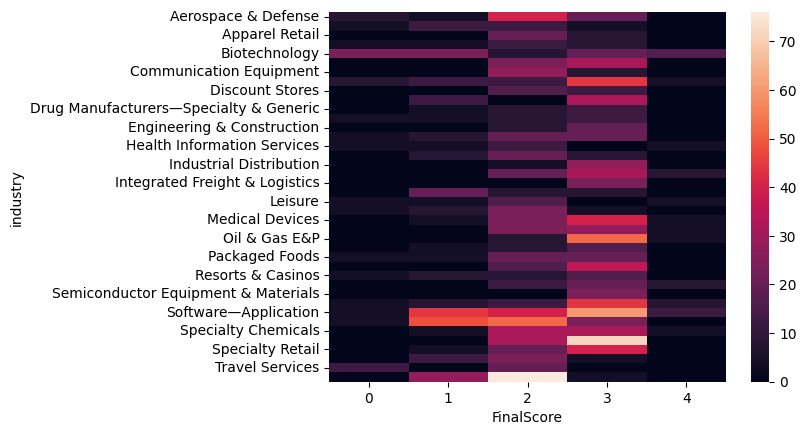

In [20]:
x=list(S[0:40].index)
df_temp = df[df['industry'].isin(x)]
x = pd.crosstab(df_temp['industry'],df_temp['FinalScore'])
x
#plt.title('Heatmap Showing distribtion of Class per Industry', fontsize = 12)
sns.heatmap(x)


<Axes: title={'center': 'Count of Records per Industry - Bottom 40'}, xlabel='industry', ylabel='Count'>

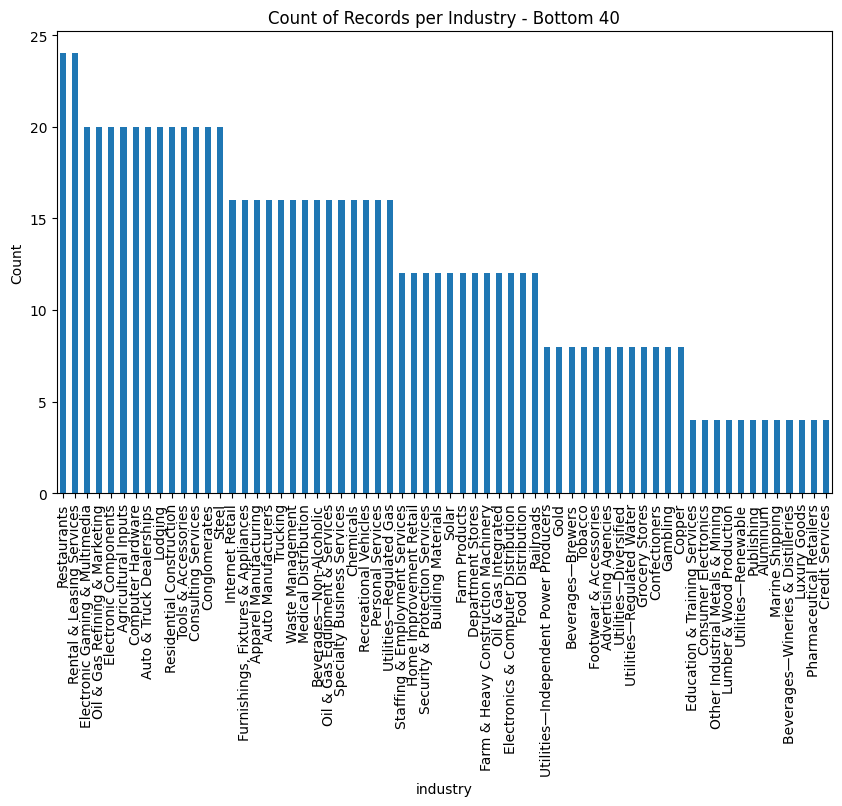

In [21]:
plt.figure(figsize=(10,6))
plt.ylabel("Count")
plt.title("Count of Records per Industry - Bottom 40")
S = df['industry'].value_counts()
S[40:].plot.bar()

[Text(0.5, 1.0, 'Heatmap Showing Class Distribution per Industry - Bottom 40')]

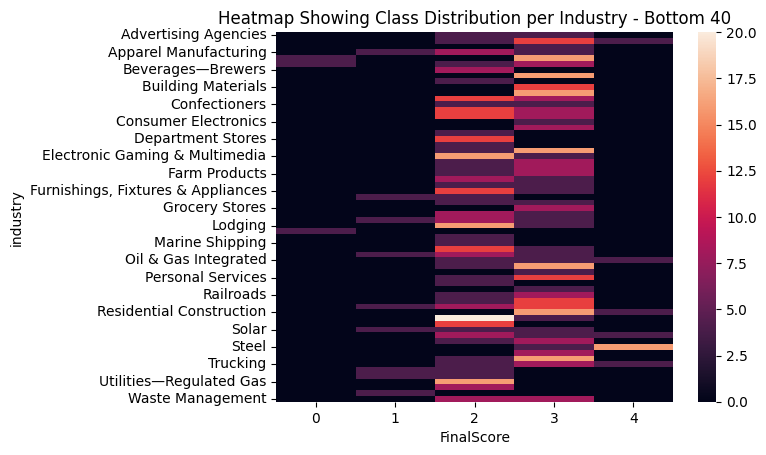

In [22]:
x=list(S[40:].index)
df_temp = df[df['industry'].isin(x)]
x = pd.crosstab(df_temp['industry'],df_temp['FinalScore'])
x
sns.heatmap(x).set(title="Heatmap Showing Class Distribution per Industry - Bottom 40")


## Scatter Plots

<Axes: xlabel='bal_workingCapital', ylabel='inc_grossProfit'>

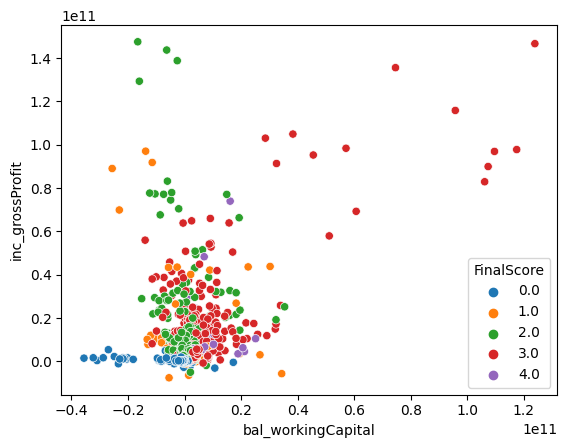

In [23]:
x_feature = 'bal_workingCapital'
y_feature = 'inc_grossProfit'
df_temp_x = df[df[x_feature] > -40000000000] 
df_temp_y = df[df[y_feature] < 150000000000]
sns.scatterplot(x=df_temp_x[x_feature],y=df_temp_y[y_feature],hue=df_temp_y['FinalScore'],palette='tab10')

<Axes: xlabel='bal_workingCapital', ylabel='inc_grossProfit'>

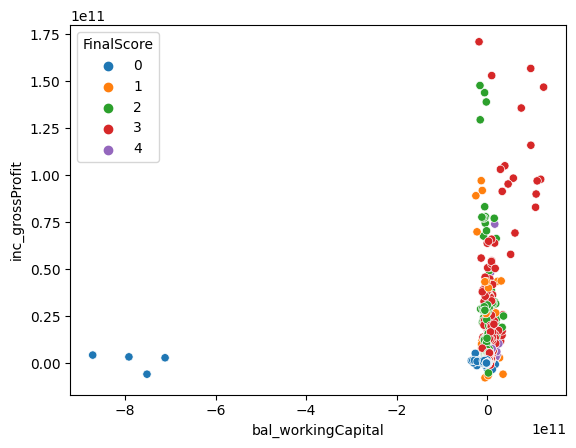

In [24]:
x_feature = 'bal_workingCapital'
y_feature = 'inc_grossProfit'
#df_temp_x = df[df[x_feature] > -40000000000] 
#df_temp_y = df[df[y_feature] < 150000000000]
df_temp_x = df
df_temp_y = df
sns.scatterplot(x=df_temp_x[x_feature],y=df_temp_y[y_feature],hue=df_temp_y['FinalScore'],palette='tab10')

<Axes: xlabel='bal_workingCapital', ylabel='bal_debtAssetRatio'>

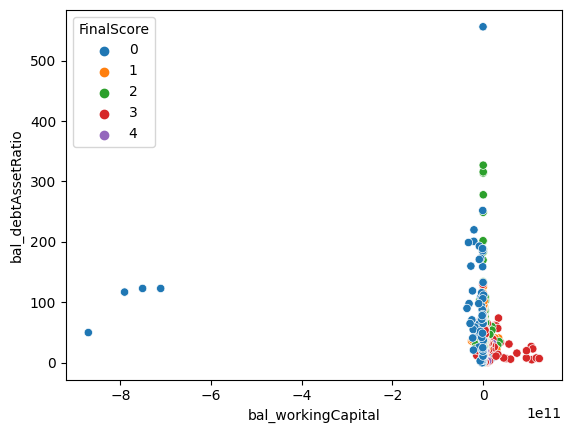

In [25]:
x_feature = 'bal_workingCapital'
y_feature = 'bal_debtAssetRatio'
#df_temp_x = df[df[x_feature] > -40000000000] 
#df_temp_y = df[df[y_feature] < 150000000000]
df_temp_x = df
df_temp_y = df
sns.scatterplot(x=df_temp_x[x_feature],y=df_temp_y[y_feature],hue=df_temp_y['FinalScore'],palette='tab10')

<Axes: xlabel='bal_workingCapital', ylabel='bal_debtAssetRatio'>

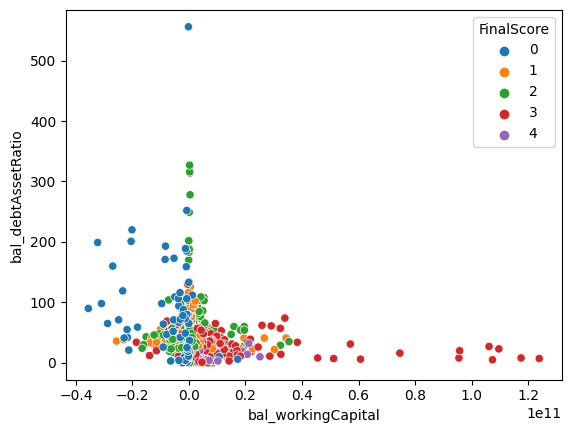

In [26]:
x_feature = 'bal_workingCapital'
y_feature = 'bal_debtAssetRatio'
df_temp_x = df[df[x_feature] > -40000000000] 
#df_temp_y = df[df[y_feature] < 150000000000]
#df_temp_x = df
df_temp_y = df
sns.scatterplot(x=df_temp_x[x_feature],y=df_temp_y[y_feature],hue=df_temp_y['FinalScore'],palette='tab10')

<Axes: xlabel='bal_workingCapital', ylabel='inc_netIncome'>

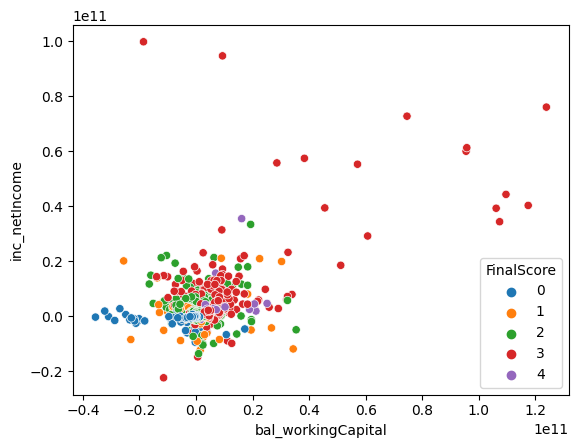

In [27]:
x_feature = 'bal_workingCapital'
y_feature = 'inc_netIncome'
df_temp_x = df[df[x_feature] > -40000000000] 
#df_temp_y = df[df[y_feature] < 150000000000]
#df_temp_x = df
df_temp_y = df
sns.scatterplot(x=df_temp_x[x_feature],y=df_temp_y[y_feature],hue=df_temp_y['FinalScore'],palette='tab10')

<Axes: xlabel='bal_workingCapital', ylabel='inc_netIncome'>

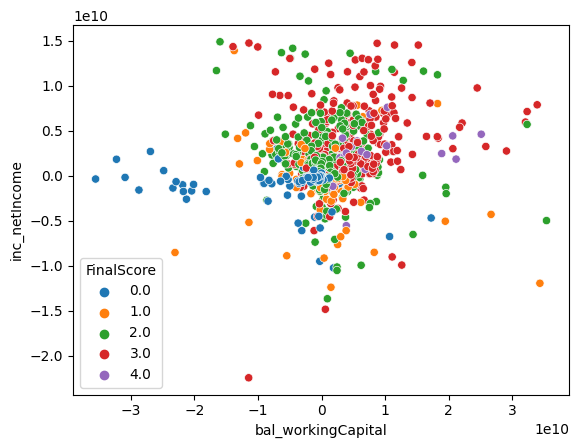

In [28]:
x_feature = 'bal_workingCapital'
y_feature = 'inc_netIncome'
df_temp_x = df[df[x_feature] > -40000000000] 
df_temp_y = df[df[y_feature] < 15000000000]
#df_temp_x = df
#df_temp_y = df
sns.scatterplot(x=df_temp_x[x_feature],y=df_temp_y[y_feature],hue=df_temp_y['FinalScore'],palette='tab10')

<Axes: xlabel='bal_stockholdersEquity', ylabel='inc_netIncome'>

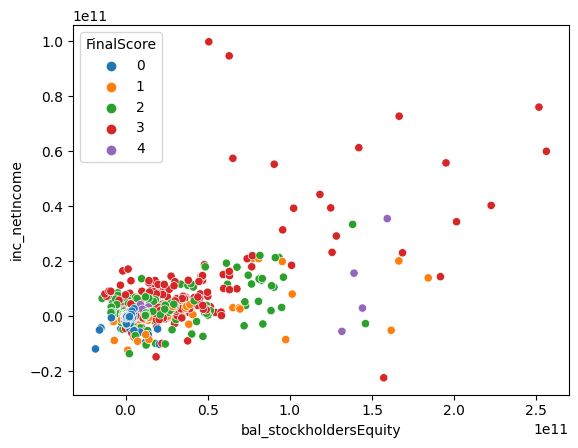

In [29]:
x_feature = 'bal_stockholdersEquity'
y_feature = 'inc_netIncome'
df_temp_x = df[df[x_feature] > -400000000000] 
df_temp_y = df[df[y_feature] < 150000000000]
#df_temp_x = df
#df_temp_y = df
sns.scatterplot(x=df_temp_x[x_feature],y=df_temp_y[y_feature],hue=df_temp_y['FinalScore'],palette='tab10')

<Axes: xlabel='bal_stockholdersEquity', ylabel='inc_netIncome'>

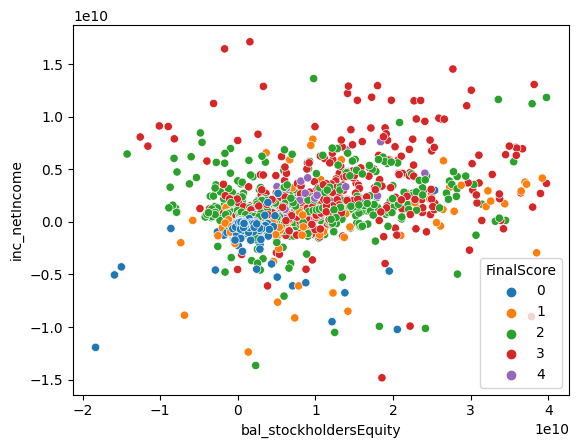

In [30]:
x_feature = 'bal_stockholdersEquity'
y_feature = 'inc_netIncome'
df_temp_x = df[df[x_feature] < 40000000000] 
df_temp_y = df[df[y_feature] < 150000000000]
#df_temp_x = df
#df_temp_y = df
sns.scatterplot(x=df_temp_x[x_feature],y=df_temp_y[y_feature],hue=df_temp_y['FinalScore'],palette='tab10')

<Axes: xlabel='cas_stockBasedCompensation', ylabel='inc_ebit'>

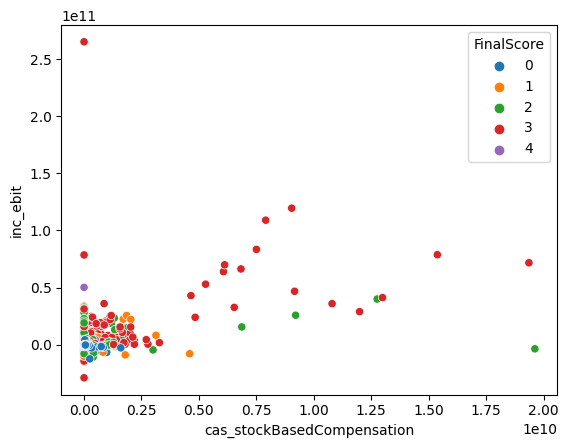

In [31]:
x_feature = 'cas_stockBasedCompensation'
y_feature = 'inc_ebit'
df_temp_x = df[df[x_feature] < 400000000000] 
df_temp_y = df[df[y_feature] < 1500000000000]
#df_temp_x = df
#df_temp_y = df
sns.scatterplot(x=df_temp_x[x_feature],y=df_temp_y[y_feature],hue=df_temp_y['FinalScore'],palette='tab10')

<Axes: xlabel='cas_stockBasedCompensation', ylabel='inc_ebit'>

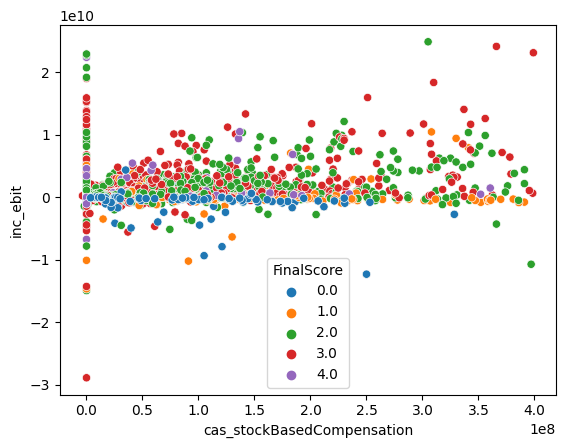

In [32]:
x_feature = 'cas_stockBasedCompensation'
y_feature = 'inc_ebit'
df_temp_x = df[df[x_feature] < 400000000] 
df_temp_y = df[df[y_feature] < 25000000000]
#df_temp_x = df
#df_temp_y = df
sns.scatterplot(x=df_temp_x[x_feature],y=df_temp_y[y_feature],hue=df_temp_y['FinalScore'],palette='tab10')

<Axes: xlabel='cas_stockBasedCompensation', ylabel='inc_grossProfit'>

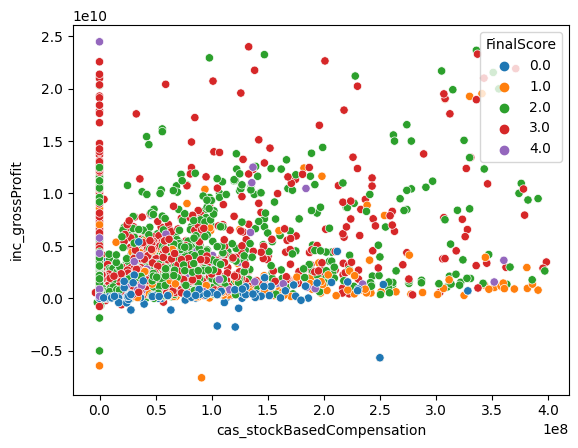

In [33]:
x_feature = 'cas_stockBasedCompensation'
y_feature = 'inc_grossProfit'
df_temp_x = df[df[x_feature] < 400000000] 
df_temp_y = df[df[y_feature] < 25000000000]
#df_temp_x = df
#df_temp_y = df
sns.scatterplot(x=df_temp_x[x_feature],y=df_temp_y[y_feature],hue=df_temp_y['FinalScore'],palette='tab10')

<Axes: xlabel='cas_stockBasedCompensation', ylabel='inc_totalRevenue'>

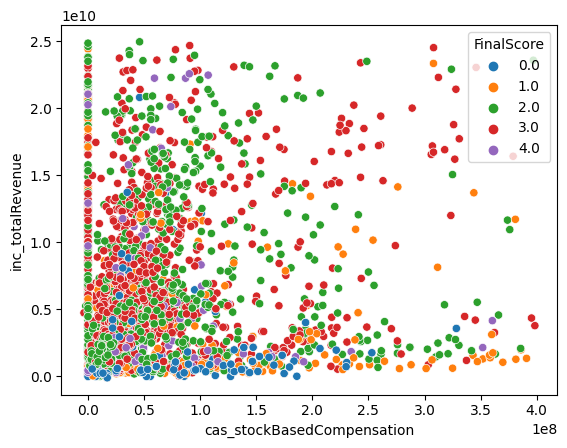

In [34]:
x_feature = 'cas_stockBasedCompensation'
y_feature = 'inc_totalRevenue'
df_temp_x = df[df[x_feature] < 400000000] 
df_temp_y = df[df[y_feature] < 25000000000]
#df_temp_x = df
#df_temp_y = df
sns.scatterplot(x=df_temp_x[x_feature],y=df_temp_y[y_feature],hue=df_temp_y['FinalScore'],palette='tab10')

In [35]:

x = pd.crosstab(df_temp['industry'],df_temp['FinalScore'])

<Axes: xlabel='inc_totalRevenue', ylabel='inc_grossProfit'>

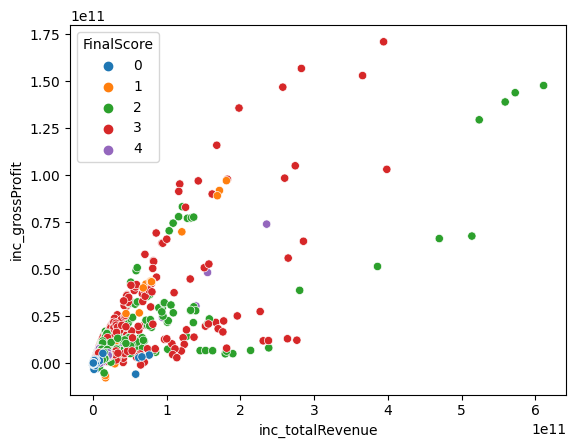

In [36]:

sns.scatterplot(x=df['inc_totalRevenue'], y=df['inc_grossProfit'], hue=df['FinalScore'], legend='full',palette='tab10')

<Axes: xlabel='inc_netIncome', ylabel='bal_stockholdersEquity'>

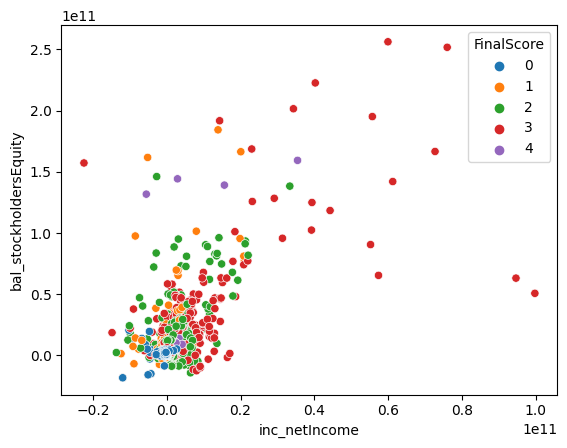

In [37]:

sns.scatterplot(x=df['inc_netIncome'], y=df['bal_stockholdersEquity'], hue=df['FinalScore'], legend='full',palette='tab10')

### How are the columns correlated

In [39]:
pd.options.display.float_format = '{:.2f}'.format
df.iloc[:,3:].corr()['FinalScore'].sort_values()

bal_debtAssetRatio                       -0.24
bal_totalLiabilities                     -0.11
bal_longTermDebt                         -0.11
bal_currentLiabilities                   -0.10
inc_interestExpense                      -0.10
bal_totalDebt                            -0.10
bal_inventory                            -0.10
bal_longTermProvisions                   -0.09
bal_debtCapitalRatio                     -0.08
bal_totalNonCurrentLiabilities           -0.07
bal_financialAssets                      -0.07
bal_netPPE                               -0.05
bal_nonCurrentDeferredTaxesLiabilities   -0.05
bal_nonCurrentDeferredLiabilities        -0.04
bal_finishedGoods                        -0.04
cas_saleOfBusiness                       -0.04
bal_workInProcess                        -0.03
cas_capitalExpenditure                   -0.03
bal_totalNonCurrentAssets                -0.03
bal_otherIntangibleAssets                -0.02
bal_currentDebt                          -0.02
cas_purchaseO